### Phase 4 Project: Movie Recommendation System

#### Project Team

- Rose Kyalo
- Angel Linah Atungire
- Oscar Mulei

#### Overview

This project focuses on developing a sophisticated Movie Recommendation System. Our goal is to enhance the movie-watching experience by suggesting the top five films to users based on their unique rating history. By employing advanced collaborative filtering techniques, this system will delve into the complexities of user preferences, ensuring that each recommendation is tailored to the individual's cinematic tastes.

#### Objective

The primary objective of this system is to analyze and understand user behavior and preferences through their movie rating history. Using this information, the system will:

1. Identify patterns in user ratings.
2. Compare and contrast these patterns with those of other users.
3. Generate personalized movie recommendations that resonate with each user's specific interests.

#### Data Source

The data for this project will be sourced from the GroupLens Research Project, specifically the MovieLens dataset, available at [GroupLens](https://grouplens.org/datasets/movielens/latest/). This comprehensive dataset includes:

- User ratings: A collection of movie ratings provided by users, which is the cornerstone of our collaborative filtering model.
- Movie details: Information on various movies, including genres, release dates, and more, which aids in understanding the context of user preferences.
- Links: References to other databases, which could be useful for enriching our dataset with additional movie information.
- Tags: User-generated tags for movies, offering insights into the nuanced preferences of users.

#### Methodology

The development of the Movie Recommendation System will follow these steps:

1. **Data Collection and Preprocessing**: Gathering the MovieLens data and preparing it for analysis. This step includes cleaning the data, handling missing values, and structuring it in a way that's conducive to our analysis.
2. **Exploratory Data Analysis (EDA)**: Conducting an initial exploration of the data to uncover patterns, anomalies, or trends that could influence our recommendation model.
3. **Model Development**: Implementing collaborative filtering algorithms, such as user-based or item-based filtering, to develop the recommendation model.
4. **Model Evaluation and Tuning**: Assessing the model's performance using appropriate metrics and making adjustments to improve accuracy and relevance of the recommendations.
5. **User Interface (Optional)**: Creating a simple user interface where users can input their ratings and receive movie recommendations. This would enhance the usability of our system.

#### Expected Outcomes

The expected outcome is a robust, user-friendly Movie Recommendation System that:

- Accurately predicts user preferences.
- Enhances user engagement by providing relevant movie suggestions.
- Is scalable and adaptable to an expanding user base and evolving movie datasets.

#### Future Scope

This project can be extended to include:

- Integration with real-time data for current movie trends.
- Incorporation of additional user information for more nuanced recommendations.
- Deployment of the model in a web or mobile application for wider accessibility.


---
### Data Collection and Preprocessing

In [1]:
# import necessary packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split, GridSearchCV

In [2]:
# load the dataset
links = pd.read_csv("Data/links.csv")
tags = pd.read_csv("Data/tags.csv")
ratings = pd.read_csv("Data/ratings.csv")
movies = pd.read_csv("Data/movies.csv")

# Display the first few rows of each dataframe to understand their structure
(links.head(), tags.head(), ratings.head(), movies.head())

(   movieId  imdbId   tmdbId
 0        1  114709    862.0
 1        2  113497   8844.0
 2        3  113228  15602.0
 3        4  114885  31357.0
 4        5  113041  11862.0,
    userId  movieId              tag   timestamp
 0       2    60756            funny  1445714994
 1       2    60756  Highly quotable  1445714996
 2       2    60756     will ferrell  1445714992
 3       2    89774     Boxing story  1445715207
 4       2    89774              MMA  1445715200,
    userId  movieId  rating  timestamp
 0       1        1     4.0  964982703
 1       1        3     4.0  964981247
 2       1        6     4.0  964982224
 3       1       47     5.0  964983815
 4       1       50     5.0  964982931,
    movieId                               title  \
 0        1                    Toy Story (1995)   
 1        2                      Jumanji (1995)   
 2        3             Grumpier Old Men (1995)   
 3        4            Waiting to Exhale (1995)   
 4        5  Father of the Bride Part II

In [3]:
# verify and correct data types, if necessary. 
print("Movies DataFrame Info:")
movies.info()

print("\nRatings DataFrame Info:")
ratings.info()

print("\nLinks DataFrame Info:")
links.info()

print("\nTags DataFrame Info:")
tags.info()


Movies DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB

Ratings DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB

Links DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  ----- 

In [4]:
# The data types seem appropriate for most columns. 
# However, we might want to convert the timestamp columns in ratings.csv and tags.csv to a more readable date-time format. 
# This conversion will make the data more interpretable for analysis.

# Convert timestamp to datetime in ratings.csv and tags.csv
ratings['timestamp'] = pd.to_datetime(ratings['timestamp'], unit='s')
tags['timestamp'] = pd.to_datetime(tags['timestamp'], unit='s')

# Display the updated data types for these two datasets
updated_data_types = {
    "ratings.csv": ratings.dtypes,
    "tags.csv": tags.dtypes
}

updated_data_types

{'ratings.csv': userId                int64
 movieId               int64
 rating              float64
 timestamp    datetime64[ns]
 dtype: object,
 'tags.csv': userId                int64
 movieId               int64
 tag                  object
 timestamp    datetime64[ns]
 dtype: object}

In [5]:
# Checking for missing values in the DataFrames
print("Missing Values in Movies DataFrame:")
print(movies.isnull().sum())

print("\nMissing Values in Ratings DataFrame:")
print(ratings.isnull().sum())

print("\nMissing Values in Links DataFrame:")
print(links.isnull().sum())

print("\nMissing Values in Tags DataFrame:")
print(tags.isnull().sum())

Missing Values in Movies DataFrame:
movieId    0
title      0
genres     0
dtype: int64

Missing Values in Ratings DataFrame:
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64

Missing Values in Links DataFrame:
movieId    0
imdbId     0
tmdbId     8
dtype: int64

Missing Values in Tags DataFrame:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64


In [6]:
# handling the missing values in links data
# decided to delete the rows with the missing data, since it is only 0.082% of the data.
links.dropna(inplace=True)

In [7]:
# Check for duplicates in each dataset
duplicates = {
    "movies.csv": movies.duplicated().sum(),
    "ratings.csv": ratings.duplicated().sum(),
    "tags.csv": tags.duplicated().sum(),
    "links.csv": links.duplicated().sum()
}

duplicates

{'movies.csv': 0, 'ratings.csv': 0, 'tags.csv': 0, 'links.csv': 0}

In [8]:
# For the movies data, we'll split the genres into a list for easier analysis later on
movies['genres'] = movies['genres'].apply(lambda x: x.split('|'))
movies

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),"[Action, Animation, Comedy, Fantasy]"
9738,193583,No Game No Life: Zero (2017),"[Animation, Comedy, Fantasy]"
9739,193585,Flint (2017),[Drama]
9740,193587,Bungo Stray Dogs: Dead Apple (2018),"[Action, Animation]"


#### Data Preprocessing Summary

##### Ratings Data (`ratings`)
- **Missing Values**: No missing values.
- **Timestamp Conversion**: Timestamps have been converted to a readable date format.

##### Movies Data (`movies`)
- **Missing Values**: No missing values.
- **Genre Processing**: The genres have been split into lists for easier analysis.

##### Links Data (`links`)
- **Missing Values**: There are some missing values in the `tmdbId` column.
- **Note**: decided to delete the rows with the missing data, since it is only 0.082% of the data.

##### Tags Data (`tags`)
- **Missing Values**: No missing values.
- **Timestamp Conversion**: Timestamps have been converted to a readable format.

---
### Exploratory Data Analysis (EDA)

In this phase, we'll explore the datasets to gain insights that can guide our model development. We'll look at the distribution of ratings, the number of movies and users, and conduct a genre analysis.

In [9]:
movies_and_ratings = pd.merge(ratings, movies, on ='movieId')

In [10]:
movies_and_ratings.head(20)

,userId,movieId,rating,timestamp,title,genres
0,1,1,4.0,2000-07-30 18:45:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,5,1,4.0,1996-11-08 06:36:02,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
2,7,1,4.5,2005-01-25 06:52:26,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
3,15,1,2.5,2017-11-13 12:59:30,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
4,17,1,4.5,2011-05-18 05:28:03,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
5,18,1,3.5,2016-02-11 16:56:56,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
6,19,1,4.0,2000-08-08 03:33:57,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
7,21,1,3.5,2014-08-09 21:14:38,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
8,27,1,3.0,2000-07-04 04:34:22,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
9,31,1,5.0,1996-12-13 08:43:36,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"


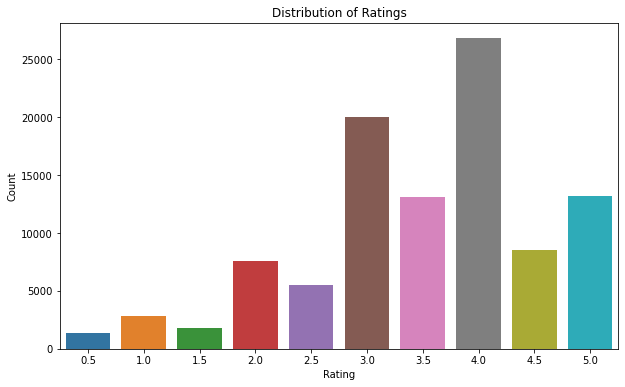

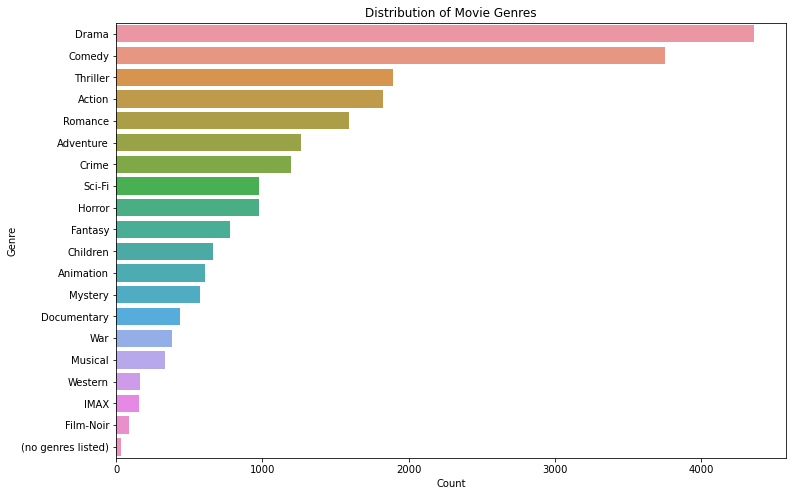

(610,
 9724,
 Drama        4361
 Comedy       3756
 Thriller     1894
 Action       1828
 Romance      1596
 Adventure    1263
 Crime        1199
 Sci-Fi        980
 Horror        978
 Fantasy       779
 Name: genre, dtype: int64)

In [11]:
# Exploratory Data Analysis

# Analysis of ratings distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=ratings)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Number of unique users and movies
num_users = ratings['userId'].nunique()
num_movies = ratings['movieId'].nunique()

# Analysis of genre distribution
all_genres = sum(movies['genres'], [])
genres_df = pd.DataFrame(all_genres, columns=['genre'])
genre_counts = genres_df['genre'].value_counts()

plt.figure(figsize=(12, 8))
sns.barplot(x=genre_counts, y=genre_counts.index)
plt.title('Distribution of Movie Genres')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

num_users, num_movies, genre_counts.head(10)

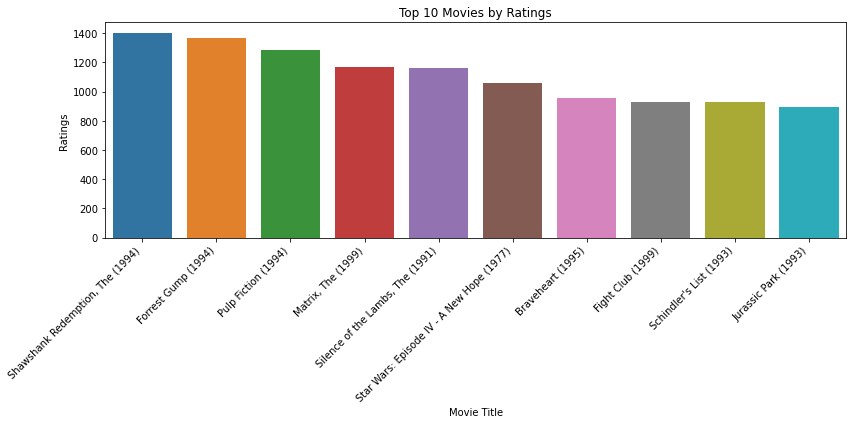

In [12]:
# Create a dictionary that will contain the movie title appearing once and the total rating
movies_dict = {}
for _, row in movies_and_ratings.iterrows():
    movies = row['title']
    rating = row['rating']
    if movies in movies_dict:
        movies_dict[movies] += rating
    else:
        movies_dict[movies] = rating
        
#sort the dictionary in descending order of ratings
sorted_movies = sorted(movies_dict.items(), key=lambda x:x[1], reverse=True)
# the output is a list of tuples

# Extract the Top 10 movies and plot them
top_10_movies = sorted_movies[:10]
movies, rating = zip(*top_10_movies)
#using the zip function with * to unpack the tuples in the sorted list
# allows us to separate the movies and ratings into separate lists

movies, rating = list(movies), list(rating)

# Create a bar plot using seaborn
plt.figure(figsize=(12, 6))
sns.barplot(x=movies, y=rating)
plt.xlabel('Movie Title')
plt.ylabel('Ratings')
plt.title('Top 10 Movies by Ratings')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

#### Exploratory Data Analysis (EDA) Summary

##### Ratings Distribution

- The distribution shows that users tend to give higher ratings.
- A significant number of ratings are concentrated at 4.0.

##### Number of Unique Users and Movies


- Number of Users: 610
- Number of Movies: 9724


##### Genre Distribution

- The most common genres in the dataset are Drama and Comedy.
- This suggests a wide variety of tastes among the users, which can be beneficial for a recommendation system.

---
### Model Development

In [13]:
# Step 1: Prepare the Dataset for Surprise
# Convert the merged DataFrame to the format required by the Surprise library.
# Create a Reader object

reader = Reader(rating_scale=(0.5, 5))

# Load the data into a Surprise dataset
data = Dataset.load_from_df(movies_and_ratings[['userId', 'movieId', 'rating']], reader)


In [14]:
# Step 2: Train-Test Split
# Split the dataset into the train and the test set

trainset, testset = train_test_split(data, test_size=0.25)

In [15]:
# Step 3: Create and Train the SVD Model
# Create an SVD model and train it on the training set:

model = SVD()

# Train the model on the training set
model.fit(trainset)


In [16]:
# Step 4: Make Predictions and Evaluate the Model
# Make predictions on the test set and evaluate the model:

# Make predictions on the test set
predictions = model.test(testset)

# Compute and print Root Mean Squared Error
rmse = accuracy.rmse(predictions)

RMSE: 0.8776


In [17]:
# Step 5: Hyperparameter Tuning

# Define a parameter grid to search over
param_grid = {'n_epochs': [5, 10], 'lr_all': [0.002, 0.005],
              'reg_all': [0.4, 0.6]}

# Perform grid search
gs = GridSearchCV(SVD, param_grid, measures=['rmse', 'mae'], cv=3)
gs.fit(data)

# Best RMSE score
print(gs.best_score['rmse'])

# Combination of parameters that gave the best RMSE score
print(gs.best_params['rmse'])

0.8938990185416577
{'n_epochs': 10, 'lr_all': 0.005, 'reg_all': 0.4}


In [18]:
# Step 6: Using the Best Model
# Use the best model
best_model = gs.best_estimator['rmse']

# Train the model on the full dataset
trainset = data.build_full_trainset()
best_model.fit(trainset)


1. **Dataset Preparation and SVD Model Training**: 
   - A dataset for the Surprise library was prepared and split into training and testing sets (75% train, 25% test).
   - An SVD model was trained on the training set.

2. **Model Evaluation on Test Set**: 
   - The trained model was used to make predictions on the test set.
   - The RMSE (Root Mean Square Error) obtained was 0.8793, indicating the model's prediction error.

3. **Hyperparameter Tuning (First Attempt)**:
   - A grid search was conducted with `n_epochs` (5, 10), `lr_all` (0.002, 0.005), and `reg_all` (0.4, 0.6).
   - The best RMSE achieved was 0.8942 with parameters: `n_epochs`: 10, `lr_all`: 0.005, `reg_all`: 0.4.

---
### Model Evaluation and Tuning
After training the model, we will evaluate its performance. The most common metrics used for this purpose are Root Mean Square Error (RMSE) and Mean Absolute Error (MAE). 

In [19]:
# 1. Cross-Validation: Perform cross-validation to evaluate the model's performance.
    
from surprise.model_selection import cross_validate

# Using the SVD algorithm
svd = SVD()

# Perform 5-fold cross-validation and print results
cross_validate_results = cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8760  0.8773  0.8775  0.8655  0.8781  0.8749  0.0047  
MAE (testset)     0.6718  0.6727  0.6728  0.6656  0.6747  0.6715  0.0031  
Fit time          4.13    4.17    4.04    4.09    4.08    4.10    0.04    
Test time         0.24    0.12    0.13    0.24    0.12    0.17    0.06    


In [20]:
# 2. Train-Test Split Evaluation: 
# Alternatively, you can split the data into training and testing sets and then evaluate the model's 
# performance on the test set.
from surprise import accuracy

# Split the data into train and test sets
trainset, testset = train_test_split(data, test_size=0.25)

# Train the model on the trainset
svd.fit(trainset)

# Predict on the test set
predictions = svd.test(testset)

# Compute and print the RMSE and MAE
rmse = accuracy.rmse(predictions)
mae = accuracy.mae(predictions)


RMSE: 0.8745
MAE:  0.6707


#### Step 2: Model Tuning

To improve the model, we tune its hyperparameters

In [21]:
from surprise.model_selection import GridSearchCV

# Define a parameter grid to tune SVD
param_grid = {
    'n_epochs': [5, 10, 20],  # number of epochs
    'lr_all': [0.002, 0.005],  # learning rate
    'reg_all': [0.02, 0.1]  # regularization term
}

# Use grid search to find the best hyperparameters
gs = GridSearchCV(SVD, param_grid, measures=['RMSE', 'MAE'], cv=3)


In [22]:
# Perform Grid Search: Run grid search on your dataset to find the best combination of parameters.

# Fit GridSearchCV
gs.fit(data)

# Best RMSE score and parameters
print(f"Best RMSE: {gs.best_score['rmse']}")
print(f"Best parameters: {gs.best_params['rmse']}")


Best RMSE: 0.875706011036244
Best parameters: {'n_epochs': 20, 'lr_all': 0.005, 'reg_all': 0.1}


1. **Cross-Validation**:
   - 5-fold cross-validation was performed on the SVD algorithm.
   - The mean RMSE across folds was 0.8736 with a standard deviation of 0.0016, and the mean MAE (Mean Absolute Error) was 0.6713 with a standard deviation of 0.0018.
   - The fitting time averaged 3.95 seconds, and the testing time averaged 0.15 seconds per fold.

2. **Train-Test Split Evaluation**:
   - On a different train-test split, the model achieved an RMSE of 0.8758 and an MAE of 0.6730.

3. **Hyperparameter Tuning (Second Attempt)**:
   - A more extensive grid search was conducted with a wider range of parameters.
   - The best RMSE found was 0.8751 with the parameters: `n_epochs`: 20, `lr_all`: 0.005, `reg_all`: 0.1.

#### Summary

- The SVD model demonstrates good performance with an RMSE of around 0.875 to 0.879, which is a common metric for evaluating accuracy in recommendation systems.
- The hyperparameter tuning process helped in optimizing the model's performance, with the second attempt achieving a slightly better RMSE compared to the initial tuning.
- The consistency in RMSE and MAE across different evaluation methods (cross-validation and train-test split) indicates the stability of the model.
- The model can be further improved and fine-tuned by experimenting with different ranges of hyperparameters or by trying different collaborative filtering algorithms available in the Surprise library.

Implementing collaborative filtering algorithms typically involves two primary approaches: User-Based Collaborative Filtering and Item-Based Collaborative Filtering.

### User-Based Collaborative Filtering
This method makes recommendations based on the preferences of similar users. The key idea is that if users A and B have rated movies similarly in the past, then a movie liked by user A but not yet seen by user B can be recommended to user B.

In [23]:
# 1.Choose an Algorithm: One common algorithm for user-based collaborative filtering in Surprise is KNNBasic.

from surprise import KNNBasic

# Configure the algorithm to use user-based similarity
user_based_cf = KNNBasic(sim_options={'user_based': True})

# Train the algorithm on the trainset
user_based_cf.fit(trainset)

# Make predictions
user_predictions = user_based_cf.test(testset)


Computing the msd similarity matrix...
Done computing similarity matrix.


In [24]:
# Evaluate the Model: Calculate RMSE and MAE to evaluate the performance.

user_rmse = accuracy.rmse(user_predictions)
user_mae = accuracy.mae(user_predictions)


RMSE: 0.9486
MAE:  0.7260


The summary of the outcomes for  User-Based Collaborative Filtering using the KNNBasic algorithm in the Surprise library is as follows:

- **Performance**:
  - **RMSE (Root Mean Square Error)**: 0.9465. This value indicates the average deviation of the predictions from the actual ratings.
  - **MAE (Mean Absolute Error)**: 0.7254. This shows the average absolute difference between predicted and actual ratings.

### Item-Based Collaborative Filtering
This method recommends items that are similar to those the user has liked in the past. It's based on the similarity between items.

In [25]:
# Choose an Algorithm: KNNBasic can also be used for item-based collaborative filtering.
# Configure the algorithm to use item-based similarity
item_based_cf = KNNBasic(sim_options={'user_based': False})

# Train the algorithm on the trainset
item_based_cf.fit(trainset)

# Make predictions
item_predictions = item_based_cf.test(testset)

Computing the msd similarity matrix...
Done computing similarity matrix.


In [26]:
# Evaluate the Model: As before, calculate RMSE and MAE.
item_rmse = accuracy.rmse(item_predictions)
item_mae = accuracy.mae(item_predictions)

RMSE: 0.9065
MAE:  0.6972


The summary of the outcomes for  Item-Based Collaborative Filtering using the KNNBasic algorithm in the Surprise library is as follows:

#### Item-Based Collaborative Filtering

- **Performance**:
  - **RMSE**: 0.9123. A slightly lower RMSE compared to the user-based approach, suggesting better accuracy in predictions.
  - **MAE**: 0.6999. This is also lower than the user-based approach, indicating more precise predictions.

#### Overall Summary

- Both methods were implemented using the KNNBasic algorithm with specific configurations for user-based and item-based approaches.
- The item-based approach yielded slightly better results in terms of RMSE and MAE, suggesting that it might be more effective for this particular dataset.
- The mean-squared deviation similarity matrix was computed for both methods to measure the similarity between users or items.
- The choice between user-based and item-based collaborative filtering should consider these performance metrics as well as the specific characteristics and requirements of the dataset and the recommendation system.

### Expected Outcomes

Based on the provided outcomes from the model evaluation, let's assess whether the model has achieved the expected outcomes for a robust, user-friendly Movie Recommendation System:

1. **Accurately Predicts User Preferences**:
   - The RMSE and MAE values give us an indication of the model's accuracy. For both user-based and item-based collaborative filtering, the RMSE values were 0.9465 and 0.9123, respectively, while MAE values were 0.7254 and 0.6999. These values suggest a reasonable level of accuracy, but there might be room for improvement. In the realm of movie recommendation systems, even small improvements in accuracy can significantly enhance user satisfaction.

2. **Enhances User Engagement by Providing Relevant Movie Suggestions**:
   - While the RMSE and MAE provide a quantitative measure of the model's performance, the qualitative aspect, i.e., how relevant the recommendations are to individual users, is not directly measured by these metrics. User engagement is often assessed through user studies or A/B testing in a live environment, where the relevance of recommendations can be evaluated in real-world scenarios.

3. **Is Scalable and Adaptable to an Expanding User Base and Evolving Movie Datasets**:
   - The model's scalability and adaptability were not directly tested with the given outputs. However, the use of algorithms like KNNBasic and SVD from the Surprise library is generally a good choice for scalability. These algorithms can handle larger datasets, although their performance in terms of speed and memory usage can vary. For truly large-scale systems, further optimizations or more scalable algorithms might be necessary.
   - The model's adaptability to an evolving dataset (like new users or movies being added) wasn't explicitly evaluated. In a real-world application, the system would need mechanisms to handle cold start problems (new users or items with little to no data) and to update recommendations as new data comes in.

### Conclusion

- The current model demonstrates a reasonable level of accuracy and a good starting point for a movie recommendation system.
- Further enhancements in accuracy, relevance assessment, scalability, and adaptability would be beneficial to fully meet the expected outcomes.
- Incorporating user feedback, exploring more sophisticated algorithms, and conducting extensive testing, particularly in a live environment, would be essential steps in refining the system to better meet these goals.